
focused.csv.gz and focused.T.csv.gz are rounded to 1000.


In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.1.5


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [5]:
df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
df.columns.names=['sample','pup','hkle','q']

In [6]:
df.head()

sample              02-2483-01A                                      \
pup                      paired                                       
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
pup                      paired              ...      paired               
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20  ...         Q20   Q20   Q20   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
pup                      paired                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [7]:
df.shape

(17409, 1918)

# Remove "pup" and "q" as they are useless in this dataset.

In [8]:
#df.columns.droplevel(1)
df=df.droplevel('pup',axis='columns').droplevel('q',axis='columns')

In [9]:
df.head()

sample              02-2483-01A                                      \
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [10]:
df.shape

(17409, 1918)

In [11]:
idx=pd.IndexSlice

#  Keep HERV only and remove the SVAs

In [12]:
df=df.loc[:,idx[:,'HERVK113']]

In [13]:
df.head()

sample              02-2483-01A 02-2483-10A 02-2485-01A 02-2485-10A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            4           2           3           8   
           1410000            1           3           4           0   

sample              06-0125-01A 06-0125-02A 06-0125-10A 06-0152-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           6           3           3   
           1410000            6           8           1           2   

sample              06-0157-01A 06-0157-10A  ... TQ-A7RK-01A TQ-A7RK-02A  \
hkle                   HERVK113    HERVK113  ...    HERVK113    HERVK113   
chromosome position                          ...                           
chr1       1048000            0           0  ...           0           0   
           1190000            0           0  ...           0           0   
           1308000            0           0  ...           0           0   
           1409000            1           1  ...          10           5   
           1410000            1           0  ...           6           3   

sample              TQ-A7RK-02B TQ-A7RK-10A TQ-A7RV-01A TQ-A7RV-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           5           6           8   
           1410000            0           0           3           5   

sample              TQ-A7RV-10A TQ-A8XE-01A TQ-A8XE-02A TQ-A8XE-10A  
hkle                   HERVK113    HERVK113    HERVK113    HERVK113  
chromosome position                                                  
chr1       1048000            0           0           0           0  
           1190000            0           0           0           0  
           1308000            0           0           0           0  
           1409000            4           5          12           6  
           1410000            2           5           2           4  

[5 rows x 274 columns]

In [14]:
df.shape

(17409, 274)

# Now the HKLE index is useless

In [15]:
df=df.droplevel('hkle',axis='columns')

In [16]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             4            2            3            8   
           1410000             1            3            4            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            6            3            3   
           1410000             6            8            1            2   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1048000             0            0  ...            0            0   
           1190000             0            0  ...            0            0   
           1308000             0            0  ...            0            0   
           1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            5            6            8   
           1410000             0            0            3            5   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1048000             0            0            0            0  
           1190000             0            0            0            0  
           1308000             0            0            0            0  
           1409000             4            5           12            6  
           1410000             2            5            2            4  

[5 rows x 274 columns]

In [17]:
df.shape

(17409, 274)

# Drop all those with 0 insertions

In [18]:
df.drop(df[df.sum(axis=1)==0].index,inplace=True)

In [19]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1409000             4            2            3            8   
           1410000             1            3            4            0   
           1580000             4            3            4            0   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1409000             9            6            3            3   
           1410000             6            8            1            2   
           1580000             9            3            5            3   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   
           1580000             1            4  ...           12            8   
           1581000             0            0  ...            0            0   
           3751000             0            0  ...            0            1   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1409000             9            5            6            8   
           1410000             0            0            3            5   
           1580000             6            5            6           11   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1409000             4            5           12            6  
           1410000             2            5            2            4  
           1580000             7            2            3            6  
           1581000             0            0            0            0  
           3751000             0            0            0            1  

[5 rows x 274 columns]

In [20]:
df.shape

(2796, 274)

# No longer a multi-index

In [21]:
#idx=pd.IndexSlice
#df.loc[:,idx[(:).match('-01A'),:,:,:]]
#idx[:,:]
#df.loc[:,slice('sample'=='0A')]

In [22]:
#df.columns.get_level_values(0).values

In [23]:
#df.columns.levels[0]

In [24]:
#df.columns.levels[1]

In [25]:
#df.columns.levels[2]

In [26]:
#df.columns.levels[3]

In [27]:
#df.columns.levels[0].str.match('.*-01.$')

In [28]:
#df.columns.levels[0][df.columns.levels[0].str.match('.*-01.$')]

Just can't figure out how to select by the index's name

In [29]:
#idx=pd.IndexSlice
#df.loc[:,idx[:,:,'HERVK113','Q20']]

In [30]:
#idx=pd.IndexSlice
#df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-01.$')],:,'HERVK113','Q20']]

In [31]:
df.columns

Index(['02-2483-01A', '02-2483-10A', '02-2485-01A', '02-2485-10A',
       '06-0125-01A', '06-0125-02A', '06-0125-10A', '06-0152-02A',
       '06-0157-01A', '06-0157-10A',
       ...
       'TQ-A7RK-01A', 'TQ-A7RK-02A', 'TQ-A7RK-02B', 'TQ-A7RK-10A',
       'TQ-A7RV-01A', 'TQ-A7RV-02A', 'TQ-A7RV-10A', 'TQ-A8XE-01A',
       'TQ-A8XE-02A', 'TQ-A8XE-10A'],
      dtype='object', name='sample', length=274)

In [32]:
#tumor=df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-01.$')],:,'HERVK113','Q20']]

In [33]:
tumor=df.loc[:,df.columns.str.match('.*-01.$')]

In [34]:
tumor.shape

(2796, 123)

In [35]:
#normal=df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113','Q20']]

In [36]:
normal=df.loc[:,df.columns.str.match('.*-10.$')]

In [37]:
normal.shape

(2796, 123)

In [38]:
normal[normal>0].count(axis=1)

chromosome  position
chr1        1409000     82
            1410000     70
            1580000     74
            1581000      2
            3751000      3
                        ..
chrY        15774000    11
            19699000    29
            19700000    30
            20552000     2
            20976000    15
Length: 2796, dtype: int64

In [39]:
normal.loc[:,normal.loc['chr1',1409000]>0]

sample               02-2483-10A  02-2485-10A  06-0125-10A  06-0157-10A  \
chromosome position                                                       
chr1       1409000             2            8            3            1   
           1410000             3            0            1            0   
           1580000             3            0            5            4   
           1581000             0            0            0            0   
           3751000             0            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            1            0            0            0   
           19699000            1            1            0            0   
           19700000            1            0            0            0   
           20552000            0            0            0            0   
           20976000            0            0            0            0   

sample               06-0171-10A  06-0190-10B  06-0210-10A  06-0211-10A  \
chromosome position                                                       
chr1       1409000             5            4            3            2   
           1410000             2            2            3            1   
           1580000             0            6            6            1   
           1581000             0            0            0            0   
           3751000             0            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            0            0            0            0   
           19699000            0            1            0            0   
           19700000            3            1            0            0   
           20552000            0            0            0            0   
           20976000            0            0            0            0   

sample               06-0214-10A  06-0221-10A  ...  HT-8104-10A  HT-A5R7-10A  \
chromosome position                            ...                             
chr1       1409000             1            4  ...            6            4   
           1410000             0            3  ...            1            1   
           1580000             3            4  ...            6            6   
           1581000             0            0  ...            0            0   
           3751000             0            0  ...            0            0   
...                          ...          ...  ...          ...          ...   
chrY       15774000            0            0  ...            0            0   
           19699000            1            1  ...            0            0   
           19700000            0            1  ...            0            0   
           20552000            0            0  ...            0            0   
           20976000            1            0  ...            0            0   

sample               HT-A61B-10A  HW-7486-10A  HW-7487-10A  IK-7675-10A  \
chromosome position                                                       
chr1       1409000             8            4            3            2   
           1410000             5            2            1            4   
           1580000             1            4            1            3   
           1581000             0            0            0            0   
           3751000             0            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            2            0            0            0   
           19699000            1            0            2            1   
           19700000            3            3            0            0   
           20552000            0            0            0            0   
           20976000            0            2            1            1   

sample               TM-A7CF-10

In [40]:
tumor.loc[:,tumor.loc['chr1',1409000]>0]

sample               02-2483-01A  02-2485-01A  06-0125-01A  06-0157-01A  \
chromosome position                                                       
chr1       1409000             4            3            9            1   
           1410000             1            4            6            1   
           1580000             4            4            9            1   
           1581000             0            0            0            0   
           3751000             0            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            0            0            0            0   
           19699000            2            0            0            0   
           19700000            0            1            0            0   
           20552000            0            0            0            0   
           20976000            0            1            0            0   

sample               06-0171-01A  06-0190-01A  06-0210-01A  06-0211-01A  \
chromosome position                                                       
chr1       1409000             3            3            5            8   
           1410000             2            2            2            6   
           1580000             4            1            7            5   
           1581000             0            0            0            0   
           3751000             0            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            0            2            0            0   
           19699000            1            2            0            2   
           19700000            0            0            0            1   
           20552000            0            0            0            0   
           20976000            1            0            0            1   

sample               06-0214-01A  06-0221-01A  ...  HT-7602-01A  HT-8104-01A  \
chromosome position                            ...                             
chr1       1409000             6            2  ...            6           13   
           1410000             1            3  ...            3            8   
           1580000             4            0  ...            1           13   
           1581000             0            0  ...            0            0   
           3751000             0            0  ...            0            0   
...                          ...          ...  ...          ...          ...   
chrY       15774000            0            0  ...            0            0   
           19699000            1            2  ...            3            0   
           19700000            0            3  ...            4            0   
           20552000            0            0  ...            0            0   
           20976000            0            0  ...            1            0   

sample               HT-A5R7-01A  HT-A61B-01A  HW-7486-01A  IK-7675-01A  \
chromosome position                                                       
chr1       1409000            10           11            4            1   
           1410000             4            6            2            4   
           1580000            13            6            5            6   
           1581000             0            0            0            0   
           3751000             1            0            0            0   
...                          ...          ...          ...          ...   
chrY       15774000            0            3            0            1   
           19699000            0            6            3            2   
           19700000            0            2            3            0   
           20552000            0            0            0            0   
           20976000            0            1            0            1   

sample               TM-A7CF-01

In [41]:
len(normal.loc[:,normal.loc['chr1',1409000]>0].columns)

82

In [42]:
#df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113',:]]>0

In [43]:
#df[(df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113',:]]>0)]

In [44]:
#df[df.loc[:,idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113',:]]>0].count(axis=1)

In [45]:
#df['normal_count']=df[df.loc[:,
#   idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113',:]]>0].count(axis=1)

In [46]:
#df['tumor_count']=df[df.loc[:,
#   idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-01.$')],:,'HERVK113',:]]>0].count(axis=1)

In [47]:
#df['normal_count']=df[df.loc[:,
#    idx[df.columns.levels[0][df.columns.levels[0].str.match('.*-10.$')],:,'HERVK113',:]]>0].count(axis=1)

In [48]:
df['normal_count']=df.loc[:,
    df.columns.str.match('.*-10.$')][ df.loc[:,df.columns.str.match('.*-10.$')]>0 ].count(axis=1)

In [49]:
df['tumor_count']=df.loc[:,
    df.columns.str.match('.*-01.$')][ df.loc[:,df.columns.str.match('.*-01.$')]>0 ].count(axis=1)

In [50]:
df['diff']=df['normal_count']-df['tumor_count']

In [51]:
df['diff']

chromosome  position
chr1        1409000     9
            1410000    -1
            1580000     1
            1581000     2
            3751000     1
                       ..
chrY        15774000    2
            19699000   -1
            19700000    0
            20552000    2
            20976000   -4
Name: diff, Length: 2796, dtype: int64

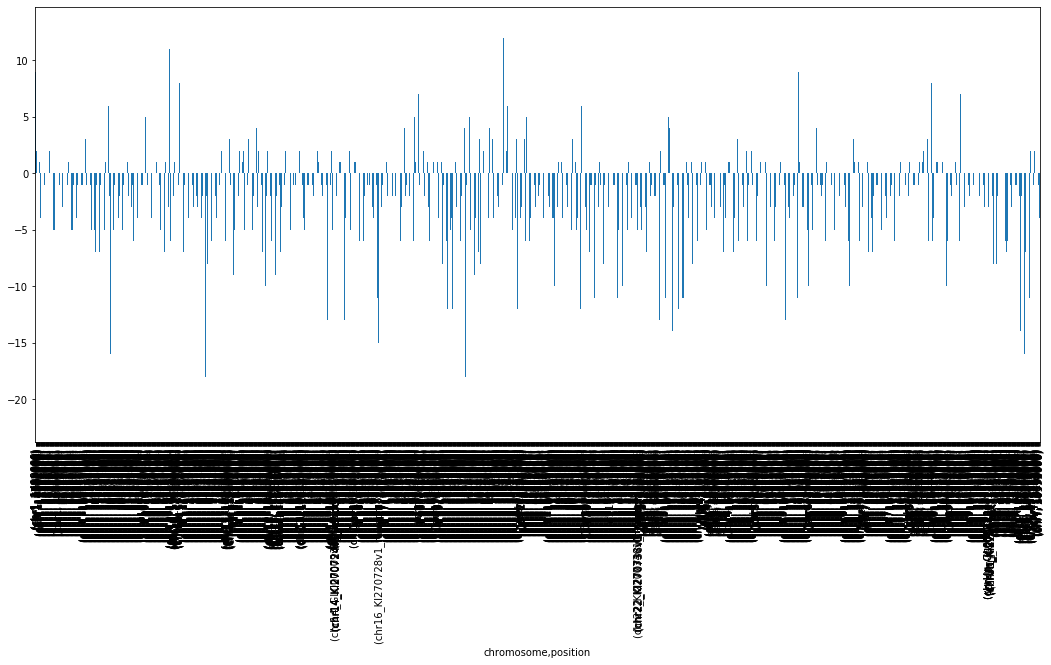

In [52]:
df['diff'].plot(kind='bar')

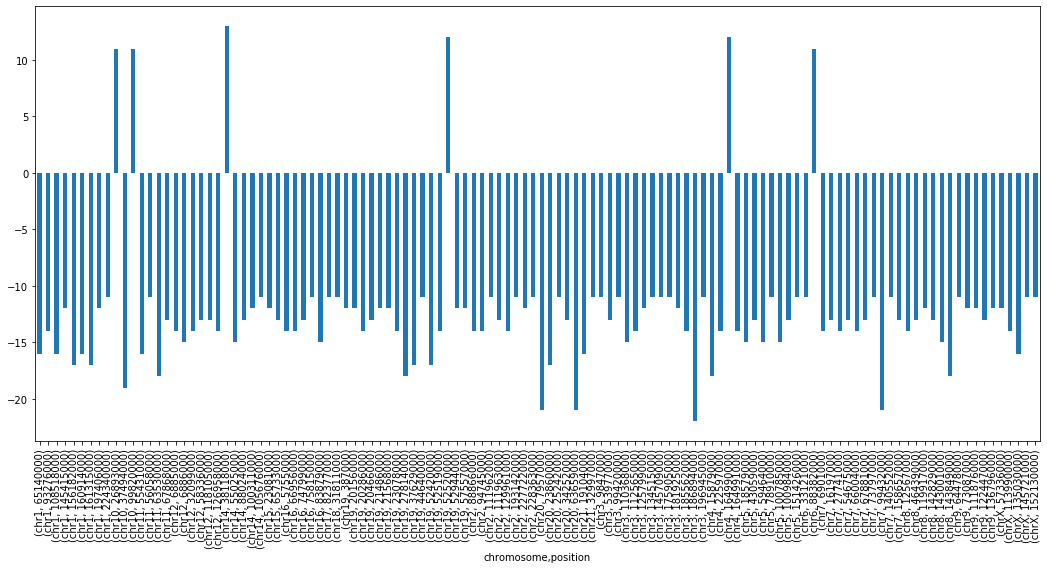

In [58]:
df[(df['diff']>10) | (df['diff']<-10)]['diff'].plot(kind='bar')

In [63]:
print(pd.get_option('display.max_rows'))

60


In [64]:
pd.set_option('display.max_rows', None)

In [66]:
pd.DataFrame(df[(df['diff']>10) | (df['diff']<-10)].index)

,0
0,"(chr1, 65140000)"
1,"(chr1, 93276000)"
2,"(chr1, 108518000)"
3,"(chr1, 145415000)"
4,"(chr1, 156182000)"
5,"(chr1, 160914000)"
6,"(chr1, 161315000)"
7,"(chr1, 197406000)"
8,"(chr1, 224340000)"
9,"(chr10, 26893000)"


In [67]:
pd.set_option('display.max_rows', 60)